## Plotting Partial Dependence
In this exercise, we will plot partial dependence plots for two variables, a1pop and temp, from a Random Forest classifier model trained to predict the customer drop-out ratio.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
import altair as alt

In [2]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter09/Dataset/phpYYZ4Qc.csv'

In [3]:
df = pd.read_csv(file_url)
y = df.pop('rej')

#split data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=1)

In [4]:
# RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1, 
                                n_estimators=50, 
                                max_depth=6, 
                                min_samples_leaf=60)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=60, n_estimators=50,
                      random_state=1)

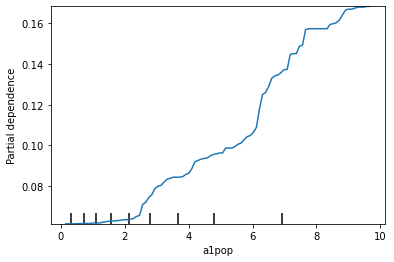

In [5]:
# plot partial dependence plot using plot_partial_dependence() of a1pop column
plot_partial_dependence(rf_model, X_test, features=[df.columns.get_loc('a1pop')])

This partial dependence plot shows that, on average, the a1pop variable doesn't affect the target variable much when its value is below 2, but from there the target increases linearly by 0.04 for each unit increase of a1pop. This means if the population size of area 1 is below the value of 2, the risk of churn is almost null. But over this limit, every increment of population size for area 1 increases the chance of churn by 4%.

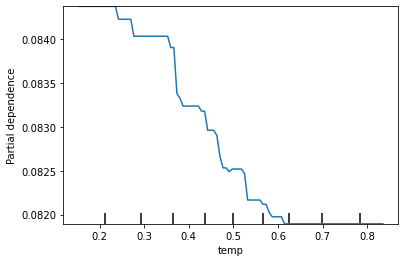

In [6]:
# plot partial dependence plot of temp column
plot_partial_dependence(rf_model, X_test, features=[df.columns.get_loc('temp')])

This partial dependence plot shows that, on average, the temp variable has a negative linear impact on the target variable: when temp increases by 1, the target variable will decrease by 0.12. This means if the temperature increases by a degree, the chance of leaving the queue decreases by 12%.

You learned how to plot and analyze a partial dependence plot for the a1pop and temp features. In this exercise, we saw that a1pop has a positive linear impact on the target, while temp has a negative linear influence.